---
# Question 1 (2 points)

1. (0.5 points) Explain what L1 and L2 regularization do, in general terms.

2. (0.5 points) Explain the difference between L1 and L2 regularization and say what advantage(s) each one confers. Put another way: explain when you might use one over the other. 

3. (1 point) Give some reasons why you think Dropout can mitigate the overfitting issue (useful readings: https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)? 


**YOUR ANSWER GOES HERE**

1. L1 regularization (Lasso) adds a penalty equal to the **absolute value of the coefficients** to the model's loss function. This forces some model coefficients to be exactly zero, effectively performing feature selection by eliminating less important features. $\\$
   L2 regularization (Ridge) adds a penalty equal to the **square of the coefficients** to the loss function. This discourages large coefficients but does not usually set them to zero—rather, it shrinks them toward zero. L2 regularization helps prevent overfitting while ensuring that all features are retained.  $\\$
   Specifically, in math, $\\$
   L1 loss function:
$$J(\mathrm{w})=\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\lambda \sum_{j=1}^p\left|w_j\right|$$
L2 loss function:
$$J(\mathbf{w})=\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2+\lambda \sum_{j=1}^p w_j^2$$

where

- $J(\mathbf{w})$ is the total loss
- $\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$ is the standard least squares error
- $\lambda \sum_{j=1}^p\left|w_j\right|$ is the L1 penalty term
- $\lambda \sum_{j=1}^p w_j^2$ is the L2 penalty term

The derative of the L1 penalty is:

$$
\frac{d}{d w_j} \lambda\left|w_j\right|= \begin{cases}\lambda, & w_j>0 \\ -\lambda, & w_j<0 \\ \left(\text { undefined at } w_j=0\right) & \end{cases}
$$


This means that instead of shrinking all coefficients proportionally, L1 applies a constant push each time. I also believe that when a weight crosses zero, many optimization algorithms set it exactly to zero. That's how some weights can be pushed to zero.

The derivative of the L2 penalty term is:

$$
\frac{d}{d w_j} \lambda w_j^2=2 \lambda w_j
$$
This means larger coefficients get shrunk more, while smaller coefficients get shrunk less.
Since the derivative is smooth and differentiable everywhere, L2 almost never forces coefficients to zero.

2. L1 regularization promotes sparsity by forcing some coefficients to be zero. It is useful for feature selection, especially when dealing with a large number of features and wanting to keep only the most important ones. Therefore, I would use L1 for large features if I want a sparser model. In cases where there are more features than observations, L1 helps avoid overfitting by selecting only the most relevant features. $\\$
L2 regularization penalizes large coefficients more heavily but does not set them to zero. Instead, it shrinks them proportionally, meaning that smaller coefficients are penalized less. L2 regularization is preferred when you believe that all features matter (such as payment history and debt-to-income ratio in credit scoring). Additionally, if you have only a small number of features and do not want one or two to dominate the results, L2 can help prevent overfitting by discouraging large weights and ensuring that no single feature has excessive influence.

3. Dropout is a regularization technique that helps prevent overfitting in neural networks by randomly setting weights to zero for a fraction of the neurons during training. 
- When neurons are dropped out during training, it forces the network not to rely on any particular neuron for making predictions. It **reduces over-reliance on specific neurons** by randomly removing them, which prevents the model from becoming too dependent on any single neuron and reduces the risk of overfitting to noise or irrelevant patterns.
- In the paper, the authors suggest that dropout helps reduce overfitting by breaking up complex **co-adaptations** between neurons. Co-adaptations refer to the case where neurons become overly reliant on one another. So, if one of these neurons is missing or behaves differently (due to new data or noise), the other may fail to function properly because they were too dependent on each other. Dropout works by randomly "turning off" (or "dropping") some neurons during training. When a neuron is turned off, it can no longer rely on other neurons. This forces the network to learn features in a more independent and generalizable way.
- Dropout creates different **thinned network** by randomly dropping units during training. Each of these models learns to make predictions based on a different subset of neurons. By training many 'thinned' networks, dropout forces the network to learn more robust, generalized features. Each 'thinned' network can be seen as a unique model and trained simultaneously. When making predictions, the network combines these models, leading to an ensemble effect that improves generalization and prevents overfitting.

# Question 2 (3 points)

You're an ML engineer working with the artist [Invader](https://www.space-invaders.com/world/), who is famous for their mosaic artworks placed in public spaces in large cities around the world. The artist also has a mobile game called Flash Invaders that lets people collect the invader mosaics by visiting the artworks around the world and taking pictures of them, trying to collect as many as they can. Your task as an ML engineer is to develop an image classifier that uses a neural network to detect whether an input image contains an invader artwork or not.

<figure>
  <img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhxvRcHu7s0v9Om9fsfj07vgawc3P3qKr84hqr27YWcPdLaXpAIbc9CFA1go-hv75rKXgOQO9Ylp6SY5Kj-vgpR6CouBvHbJtKoA8cUTLRl4TRE9FCS11YgQv-Z8PuCqywVOQeD/d/Invader_FlashInvader.jpg" width=500 alt="FlashInvaders app screenshot">
  <figcaption>Screenshots of the Flash Invaders game. The game lets users take photos of the artworks from their phone and rewards them with +30 points if the photo contains an invader artwork in it. 
  Your job is to implement an ML algorithm for classifying whether a photo taken by a user contains an invader artwork in it or not, like in the figure above. </figcaption>
</figure>


The artist has given you an image dataset of the artworks that your algorithm is supposed to identify, as shown above. Your initial dataset contains photos of <b>all</b> of the artworks you need to identify. However, <b>all of these photos were taken in the artist's studio</b>, before the art was installed in the public venues, which means they were all taken at a **perfect angle and lightning** and have no background <br/><br/>


<figure>
  <img src=https://i.imgur.com/tZbHLPk.png" width=500 alt="FlashInvaders app screenshot">
  <figcaption>This is an excerpt of the dataset you will have available for training. Notice that all of the artworks are digital illustrations and not real photos, meaning that they are under perfect lighting conditions and camera angles. </figcaption>
</figure>

<figure>
  <img src="https://i.imgur.com/7fht7p5.png" width=500 alt="FlashInvaders app screenshot">
  <figcaption>These are the kind of photos your machine learning will receive as input. </figcaption>
</figure>

In the real world, your model will receive as input photos taken by users from their phones, which means that the photos will be taken under different conditions than the ones in your training dataset. For example, look at the photos above. 

Your task is to figure out a data augmentation scheme that will improve the performance of your machine learning model under unseen conditions. <br/> 
<br/>

1. <b>(1 point)</b> How is your training data different from the data your model will be presented at inference time?  What are the different real-world conditions that you think could affect your model's ability to accurately identify the artworks? <br/><br/> 

2. <b>(1 point)</b> Explain any data augmentation techniques you could use to make your model robust to the real-world conditions you described above.


3. <b>(1 point)</b> Explain a data augmentation technique that does not make sense in terms of our desired task, and would not improve our model's performance.


**YOUR ANSWER GOES HERE**

1. The training data is captured in the artist's studio, where all photos of the artworks were taken under controlled conditions:

- Perfect angle and lighting: The photos are likely to be taken from a single angle with ideal lighting, which will be consistent across all images in the dataset.
- No background: The artworks are isolated against a neutral background, which makes it easier for the model to identify the artwork itself.

Real-world conditions could vary significantly:

- Different angles: Users will take photos from different angles, which can distort the perspective of the artwork.
- Different lighting: The lighting in public spaces will vary (e.g., natural sunlight, streetlights, or dark environments), which could affect the visibility of the artwork.
- Different backgrounds: Real-world images may contain backgrounds (e.g., people, vehicles, or buildings) that can make it more challenging for the model to focus on the artwork.
- Different camera quality: Users' phone cameras may have different resolutions, focus quality, and image noise, which could affect the model’s ability to clearly detect the artwork.

2. To address the real-world conditions and make the model more robust, we can use the following **data augmentation** techniques:
- Rotation and flipping: We can randomly rotate images within a certain angle range (e.g., -30° to 30°). This will simulate users taking photos from different angles. Or we can flip the image horizontally or vertically to simulate different orientations.
- Brightness and contrast adjustments: We can randomly vary the brightness of the image by increasing or decreasing pixel values or vary the contrast by adjusting the difference between light and dark areas.
- Random cropping: We can crop out a random section of the image to simulate varying parts of the artwork being visible.
- Adding noise: We can add random noise (Gaussian noise) to each pixel, which simulates poor image quality or environmental factors like rain or low light.
- Variations in Color: We can adjust the hue, saturation, and lightness of an image randomly to simulate different lighting conditions or different photo qualities.

3. I think random rotation by 90°, 180°, or 270° or flipping vertically will not work. The artworks may have a specific orientation when installed in public spaces; however, taking photos from random orientations will not be as extreme as rotating by 90° or 180°. Therefore, applying such extreme rotations during training could lead the model to learn incorrect representations, especially for mosaic-style artwork. This is because it would render the artwork upside down, making the tiles look entirely different in the context of the image and distorting the intended design. The same applies to flipping, especially vertical flipping. Just like with Pac-Man, flipping it vertically would change its design and make it unrecognizable. In the same way, vertical flipping of a mosaic artwork would distort the arrangement of its tiles, changing the overall appearance of the artwork.

# Question 3 (3 points)

In this question, you will do your best to make a network to embody the function $y=x_1 * x_2$. Here, assume $x_1,x_2 \in {\Bbb R}$ and $x_1,x_2 \in (-1000,1000)$.

Assume you are starting from random weight initialization. Feel free to use any of the Non-linear Activations (weighted sum, nonlinearity) in [torch.nn](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). Use as many layers as you like. Make the layers as big as you like.

* Note, you are not allowed to simply put some variant of $output = x_1*x_2$ in your forward function.

You will make a training dataset and a test dataset using the provided dataset generator. Train the network on the training set and, once trained, test it on the test data. Make sure your test set is at minimum 1000 examples. Use mean-squared-error as your objective function. Then answer the following questions.

1. What was the best mean-squared-error you got on the training data?

1. What was the best mean-squared-error you got on the test data?

1. What challenges or difficulties did you encounter in implementing and training this network?

**YOUR ANSWER GOES HERE**

1. Best mean-squared-error I got on the training data: 6,979,898,864
2. Best mean-squared-error I got on the testing data: 4,494,877,264
3. 
    -  I tried both very large networks (with up to five layers and thousands of neurons) and simpler networks with fewer parameters, but both performed poorly.
    - A major challenge is that multiplication is not naturally represented by standard feed-forward networks, which are built on additive transformations.
    - Also, the input values range from -1000 to 1000, meaning small prediction errors can lead to massive MSE values. This makes training and evaluation difficult.
    - I experimented with ReLU, Sigmoid, and TanH activation functions, but none significantly improved performance.
    - Dropout and deeper architectures did not help because the network fundamentally struggles to learn the multiplicative relationship using standard activation functions.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np


In [5]:
# HERE'S A DATASET GENERATOR TO HELP YOU TEST/TRAIN.

import torch
import numpy as np
class MultiplyDataset(torch.utils.data.Dataset):
    """MULTIPLY Dataset."""

    def __init__(self, num_examples, max_abs=1000):
        """create a dataset of the form x_1 * x_2 = y. The input x_1, x_2 is a
        pair of values drawn from the default range [-1000, 1000]. The output y is a scalar.

        PARAMETERS
        ----------
        num_examples    An integer determining how much data we'll generate
        max_abs         The largest absolute value a datapoint can have
        """
        self.length = num_examples

        # make a circular unit Gaussian and draw samples from it
        data = np.random.uniform(low=-1, high=1, size=(self.length, 2))

        data *= max_abs
        # figure out the label (i.e. the result of the multiplication)
        label = np.multiply(data.T[0],data.T[1])

        # turn it into a tensor
        self.data =  torch.tensor(data).to(dtype=torch.float32)
        self.label = torch.tensor(label).to(dtype=torch.float32)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

In [123]:
# Create an instance of the MultiplyDataset class
dataset = MultiplyDataset(num_examples=10)  # Let's use 10 examples for simplicity

# Access the first data point
sample_input, sample_output = dataset[0]

# Print the input and output
print(f"Input: {sample_input}, Output: {sample_output}")

Input: tensor([440.9370, 730.0034]), Output: 321885.53125


In [ ]:
class LargeMultiplyModel(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super().__init__()  
        # Layer 1
        self.layer1 = nn.Linear(2, 256)  # First layer with 256 neurons
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout after layer 1
        
        # Layer 2
        self.layer2 = nn.Linear(256, 512)  # Second layer with 512 neurons
        self.dropout2 = nn.Dropout(dropout_rate)  # Dropout after layer 2
        
        # Layer 3
        self.layer3 = nn.Linear(512, 1024)  # Third layer with 1024 neurons
        self.dropout3 = nn.Dropout(dropout_rate)  # Dropout after layer 3
        
        # Layer 4
        self.layer4 = nn.Linear(1024, 2048)  # Fourth layer with 2048 neurons
        self.dropout4 = nn.Dropout(dropout_rate)  # Dropout after layer 4
        
        # Layer 5
        self.layer5 = nn.Linear(2048, 4096)  # Fifth layer with 4096 neurons
        self.dropout5 = nn.Dropout(dropout_rate)  # Dropout after layer 5
        
        # Output layer
        self.output_layer = nn.Linear(4096, 1)  # Final output layer with 1 neuron

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x) 
        x = torch.relu(self.layer2(x))  
        x = self.dropout2(x)  
        x = torch.relu(self.layer3(x))  
        x = self.dropout3(x)  
        x = torch.relu(self.layer4(x))  
        x = self.dropout4(x)  
        x = torch.relu(self.layer5(x)) 
        x = self.dropout5(x)  
        output = self.output_layer(x)
        
        return output



# Apply Xavier Initialization to the weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)  # Xavier initialization
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# Training and testing the network
def train_and_test(num_train=1000, num_test=1000, max_abs=1000, epochs=100):
    # Create datasets
    train_dataset = MultiplyDataset(num_train, max_abs)
    test_dataset = MultiplyDataset(num_test, max_abs)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model, loss function, and optimizer
    model = LargeMultiplyModel() 
    model.apply(init_weights)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    best_train_mse = float('inf')
    best_test_mse = float('inf')

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Compute the loss
            loss = criterion(outputs, targets.view(-1, 1))
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # Update weights
            optimizer.step()

            running_loss += loss.item()

        train_mse = running_loss / len(train_loader)

        # Test loop
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets.view(-1, 1))
                test_loss += loss.item()

        test_mse = test_loss / len(test_loader)

        # Track best MSE
        best_train_mse = min(best_train_mse, train_mse)
        best_test_mse = min(best_test_mse, test_mse)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

    return best_train_mse, best_test_mse


# Run the training and testing
best_train_mse, best_test_mse = train_and_test()

print(f"Best Train MSE: {best_train_mse:.4f}")
print(f"Best Test MSE: {best_test_mse:.4f}")

Epoch 0/100, Train MSE: 55922695968.0000, Test MSE: 10817833136.0000
Epoch 10/100, Train MSE: 7805626272.0000, Test MSE: 8976699456.0000
Epoch 20/100, Train MSE: 9287160192.0000, Test MSE: 12331603184.0000
Epoch 30/100, Train MSE: 8892371992.0000, Test MSE: 15048267216.0000
Epoch 40/100, Train MSE: 7365305848.0000, Test MSE: 8167008712.0000
Epoch 50/100, Train MSE: 8587053848.0000, Test MSE: 10153826112.0000
Epoch 60/100, Train MSE: 7678071760.0000, Test MSE: 7396375040.0000
Epoch 70/100, Train MSE: 7930527768.0000, Test MSE: 6168831280.0000
Epoch 80/100, Train MSE: 8165299208.0000, Test MSE: 13229251248.0000
Epoch 90/100, Train MSE: 7088194656.0000, Test MSE: 16458941008.0000
Best Train MSE: 6979898864.0000
Best Test MSE: 4494877264.0000


# Question 4 (2 points)

We're now going to think about how easy or hard it is to solve the general multiplication problem for real numbers: $y= x_1*x_2$, when $x_1,x_2 \in {\Bbb R}$ are not bounded to the limited range (-1000,1000).

Define a "simple" feed-forward neural network as one where each layer $l$ takes input from only the previous layer $l-1$.
Let's assume our simple feed-forward network only uses "standard" nodes. We'll define a "standard" one as one that take a weighted sum $z=\mathbf{w}^T\mathbf{x}$ of inputs $\mathbf{x}$, given weights $\mathbf{w}$, and then applies a differentiable activation function $f()$ to $z$. Example "standard" nodes include ReLu, Leaky ReLU, Sigmoid, TanH, and the linear/identity function.

Define "correctly" performing multiplication as estimating $\hat{y}= x_1*x_2$  to 2 decimal places of precision (i.e. $ |\hat{y}-y| < 0.01)$. Here, $\hat{y}$ is the network's result and $y$ is the true answer.

Is it possible to make a "simple" feed-forward neural network that can correctly perform multiplication for any arbitrary pair $x_1,x_2 \in {\Bbb R}$? **Support your answer.** This doesn't have to be a mathematical proof, but you do have to clearly explain your reasoning.

*Hint: Think about what a "standard" node calculates. Think about how you would implement multiplication using addition.*


**YOUR ANSWER GOES HERE**

- If we're only allowed to use standard activation function such as ReLu, Leaky ReLU, Sigmoid, TanH, and the linear/identity function, I don't think it's possible to learn $y = x_1*x_2.$ The reason is as follows:
    * Standard nodes compute a weighted sum of inputs: $$z=w_1 x_1+w_2 x_2+b.$$
    * Nonlinear activation function $f(z)$ is then applied.
    * Common activation functions include:
        * ReLU: $f(z)=\max (0, z)$
        * Sigmoid: $f(z)=\frac{1}{1+e^{-z}}$
        * TanH: $f(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}$
    * The problem for these activation functions are:
        * ReLU: $f(z)=\max (0, z)$
            * ReLU is piecewise linear and does not introduce cross-terms.
            * It only applies a thresholding effect but still processes a sum of inputs.
            * Cannot produce multiplication.
        * Sigmoid: $f(z)=\frac{1}{1+e^{-z}}$
            * Although Sigmoid is nonlinear, it only warps sums into an S-shaped curve.
            * Cannot generate the interaction term of $x_1*x_2$
        * TanH: $f(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}$
            * Like Sigmoid, it cannot generate interaction term
    * The main problem is that multiplication requires interactions between variables, but standard activation functions (ReLU, Sigmoid, TanH) only apply non-linearity to sums of weighted inputs. Because of this, even adding more layers preserves the additive structure without creating multiplicative terms.



- If we're allowed to transform the inputs before feeding them into the neural network, we can do: $$x_1 \rightarrow \log x_1, \quad x_2 \rightarrow \log x_2, \quad y \rightarrow \log y$$
    * Can train the network to learn addition instead of multiplication: $$\log y=\log x_1+\log x_2$$
    * After the network predicts $\log y$, we can apply exponentiation to recover the output: $$y=e^{\mathrm{NN}\left(\log x_1, \log x_2\right)}$$.
    * Need to handle the sign properly to allow for zero and negative values...
    

- However if we're allowed to use a **square activation function** $f(z)=z^2$, it would be possible.
    * First layer: Computes $s = x_1 + x_2$ and $d = x_1 - x_2$.
    * Use square activation function: Computes $s^2$ and $d^2$.
    * Final layer: Computes $$y = \frac{(s^2-d^2)}{4} = \frac{(x_1 + x_2)^2 - (x_1 - x_2)^2}{4} = x_1 * x_2.$$
    * Python implementation below shows the performance is pretty good.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class MultiplyDataset(torch.utils.data.Dataset):
    """MULTIPLY Dataset."""

    def __init__(self, num_examples, max_abs=1000):
        """create a dataset of the form x_1 * x_2 = y. The input x_1, x_2 is a
        pair of values drawn from the default range [-1000, 1000]. The output y is a scalar.

        PARAMETERS
        ----------
        num_examples    An integer determining how much data we'll generate
        max_abs         The largest absolute value a datapoint can have
        """
        self.length = num_examples

        # make a circular unit Gaussian and draw samples from it
        data = np.random.uniform(low=-1, high=1, size=(self.length, 2))

        data *= max_abs
        # figure out the label (i.e. the result of the multiplication)
        label = np.multiply(data.T[0],data.T[1])

        # turn it into a tensor
        self.data =  torch.tensor(data).to(dtype=torch.float32)
        self.label = torch.tensor(label).to(dtype=torch.float32)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

# Custom activation function: Squaring
class SquareActivation(nn.Module):
    def forward(self, x):
        return x ** 2

# Neural network with explicit squaring activation
class MultiplyNN(nn.Module):
    def __init__(self):
        super().__init__()
        # First layer: Computes (x1 + x2) and (x1 - x2)
        self.linear1 = nn.Linear(2, 2, bias=False)  # No bias needed, just transformation
        self.linear1.weight = nn.Parameter(torch.tensor([[1.0, 1.0], [1.0, -1.0]]))  # Fixed weights

        # Squaring activation
        self.square = SquareActivation()

        # Final layer: Computes (s^2 - d^2)/4
        self.linear2 = nn.Linear(2, 1, bias=False)
        self.linear2.weight = nn.Parameter(torch.tensor([[0.25, -0.25]]))  # Implement (s^2 - d^2)/4

    def forward(self, x):
        x = self.linear1(x)  # Compute (x1 + x2) and (x1 - x2)
        x = self.square(x)   # Square the outputs
        x = self.linear2(x)  # Compute final multiplication
        return x


def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)

# Train and evaluate the network
def train_and_test(num_train=1000, num_test=1000, max_abs=1000, epochs=100):
    train_dataset = MultiplyDataset(num_train, max_abs)
    test_dataset = MultiplyDataset(num_test, max_abs)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    model = MultiplyNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_train_mse = float('inf')
    best_test_mse = float('inf')

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.view(-1), targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_mse = running_loss / len(train_loader)

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs.view(-1), targets)
                test_loss += loss.item()

        test_mse = test_loss / len(test_loader)
        best_train_mse = min(best_train_mse, train_mse)
        best_test_mse = min(best_test_mse, test_mse)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

    return best_train_mse, best_test_mse

# Run the training and testing
best_train_mse, best_test_mse = train_and_test()

print(f"Best Train MSE: {best_train_mse:.6f}")
print(f"Best Test MSE: {best_test_mse:.6f}")


Epoch 0/100, Train MSE: 676557.4167, Test MSE: 165675.3870
Epoch 10/100, Train MSE: 0.2941, Test MSE: 0.0942
Epoch 20/100, Train MSE: 326531.7789, Test MSE: 752164.8506
Epoch 30/100, Train MSE: 4.0271, Test MSE: 0.4981
Epoch 40/100, Train MSE: 0.1562, Test MSE: 0.0853
Epoch 50/100, Train MSE: 75.0511, Test MSE: 91.8583
Epoch 60/100, Train MSE: 344182.2730, Test MSE: 448590.9573
Epoch 70/100, Train MSE: 0.0335, Test MSE: 0.0259
Epoch 80/100, Train MSE: 0.0209, Test MSE: 0.0258
Epoch 90/100, Train MSE: 0.0151, Test MSE: 0.0016
Best Train MSE: 0.002271
Best Test MSE: 0.001557


# Question 5 (2 points)

Suppose you want to build a fully convolutional network, YouNet, which converts an image with cropped ImageNet dimensions (256, 256), to MNIST dimensions (28, 28), and back to (256, 256). This network contains a convolutional layer that maps an image from (256, 256) -> (28, 28), and a transposed convolutional layer that maps an image from (28, 28) -> (256, 256).

In [124]:
import torch
import torch.nn as nn

class YouNet(nn.Module):
    def __init__(self,
                 kernel_1: tuple[int, int],
                 kernel_2: tuple[int, int],
                 stride_1: tuple[int, int] = (1, 1),
                 stride_2: tuple[int, int] = (1, 1)):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 1, kernel_1, stride=stride_1)
        self.conv2 = nn.ConvTranspose2d(1, 1, kernel_2, stride=stride_2)

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        mnist = self.conv1(x)
        imagenet = self.conv2(mnist)
        return mnist, imagenet

1. Find valid kernel sizes for the convolutional layers when `stride=(1, 1)`. You are not allowed to change YouNet definition of the convolutional layers. By 'valid', we mean that using the kernel results in a `mnist.shape` and an `imagenet.shape` that pass the assert statement below.


**YOUR ANSWER GOES HERE**

In [131]:
kernel_1 = [229,229]# YOUR ANSWER GOES HERE
kernel_2 = [229,229]# YOUR ANSWER GOES HERE

network = YouNet(kernel_1, kernel_2)
mnist, imagenet = network(torch.zeros(1, 1, 256, 256))

assert mnist.shape == (1, 1, 28, 28)
assert imagenet.shape == (1, 1, 256, 256)

2. Find valid (i.e. ones that pass the assert statement below) kernel sizes for when `stride=(8, 8)`


**YOUR ANSWER GOES HERE**

In [137]:

kernel_1 = [40,40]# YOUR ANSWER GOES HERE
kernel_2 = [40,40]# YOUR ANSWER GOES HERE

network = YouNet(kernel_1, kernel_2, stride_1=(8, 8), stride_2=(8, 8))
mnist, imagenet = network(torch.zeros(1, 1, 256, 256))

print('mnist = ', mnist.shape)
print('imagenet = ',imagenet.shape)

assert mnist.shape == (1, 1, 28, 28)
assert imagenet.shape == (1, 1, 256, 256)

mnist =  torch.Size([1, 1, 28, 28])
imagenet =  torch.Size([1, 1, 256, 256])


3. Suppose instead of processing an image of size (256, 256) with the YouNet you implemented in part 2, you want to process an input image of size (257, 257). What would the sizes of the two processed output images be? Why doesn't the imagenet output have dimensionality (257, 257)? (Hint: Does the strided convolution process all the rows and columns of the original image?)

In [138]:
kernel_1 = [40,40]# YOUR ANSWER GOES HERE
kernel_2 = [40,40]# YOUR ANSWER GOES HERE

network = YouNet(kernel_1, kernel_2, stride_1=(8, 8), stride_2=(8, 8))
mnist, imagenet = network(torch.zeros(1, 1, 258, 258))

print('mnist = ', mnist.shape)
print('imagenet = ',imagenet.shape)

assert mnist.shape == (1, 1, 28, 28)
assert imagenet.shape == (1, 1, 256, 256)

mnist =  torch.Size([1, 1, 28, 28])
imagenet =  torch.Size([1, 1, 256, 256])


**YOUR ANSWER GOES HERE**
- The expected output for Downsampled MNIST-sized output is: (1,1,28,28). The expected output for Upsampled ImageNet-sized output is:(1,1,256,256).
- The stride of 8 means the convolution samples pixels every 8 positions. Since 
$$H_{\text {out }}=\left\lfloor\frac{257-40}{8}\right\rfloor+1 =\lfloor 27.125\rfloor+1 = 28,$$
we know the last row/column is not being fully processed since they do not align with the stride steps. Speicifically, $257-40$ is not divisible by 8 (with a remainder of 1), which means the convolution filter does not fully cover the last row and column, so they are not processed as part of a full step.
-  `assert imagenet.shape == (1, 1, 256, 256)` confirms that the effective original size being processed is 256 × 256, even though the input was 257 × 257.


4. Suppose you are processing an image of size (264, 264) with the YouNet implemented in part 2. What would be the sizes of the two processed images output by the network? For an image of this size, does the imagenet output have the same size as the input?



**YOUR ANSWER GOES HERE**
- Unlike the (257, 257) case, where the stride couldn't take a full extra step, here, $264 - 40$ is perfectly divisible by 8.  
- This allows the convolution to take **one additional stride step**, meaning the entire image gets processed (i.e., resulting in a **29 × 29** feature map).  
- Since the downsampled feature map is **29 × 29**, the transposed convolution naturally restores the original (264, 264) size.  
- Yes, for an **input of (264, 264)**, the **ImageNet output does have the same size as the input**, i.e., **(264, 264)**.  

In [140]:
kernel_1 = [40,40]# YOUR ANSWER GOES HERE
kernel_2 = [40,40]# YOUR ANSWER GOES HERE

network = YouNet(kernel_1, kernel_2, stride_1=(8, 8), stride_2=(8, 8))
mnist, imagenet = network(torch.zeros(1, 1, 264, 264))

print('mnist = ', mnist.shape)
print('imagenet = ',imagenet.shape)

assert mnist.shape == (1, 1, 29, 29)
assert imagenet.shape == (1, 1, 264, 264)

mnist =  torch.Size([1, 1, 29, 29])
imagenet =  torch.Size([1, 1, 264, 264])


# Question 6 (3 points)

The paper [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167v3.pdf) is in our class readings list and describes one of the most popular normalization approaches.  

Specifically, you are to reproduce the experiment in **section 4.1** of the paper, providing an output figure like **figure 1(a)**.

This means making a network module that has **the architecture described in section 4.1** of the paper. You will need to create two alternative versions of your network module: one model that has at least one batch normalization layer, another module that has no batch normalization layer. Pytorch provides a handy
[function](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) or [two](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) to help with this.

* Note, you don't have to duplicate their weight initializations. Using the default weight initializations is fine.

The famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset is available in [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html). You can download it just by declarng the dataset and specifying download=true. See the torchvision.dataset docs for more on that.

* Note, torchvision.datasets has both test and train datasets available for MNIST.

* Note, they never specify in the paper HOW BIG the testing (I think they mean VALIDATION, actually) set they use is. Yours could be just a couple of hundred examples.

* Note that you don't have to run the test after every training step. Every 20 training steps would be fine.

1. Put your graph similar to **figure 1(a)** from the paper below. The vertical dimension of your graph should be accuracy. The horizontal dimension should be number of training steps (not epochs). One training step = one update of model weights. NOTE: If you have a smaller validation set, your graph may be more noisy than the one in the paper. That's OK.

***YOUR GRAPH GOES HERE***

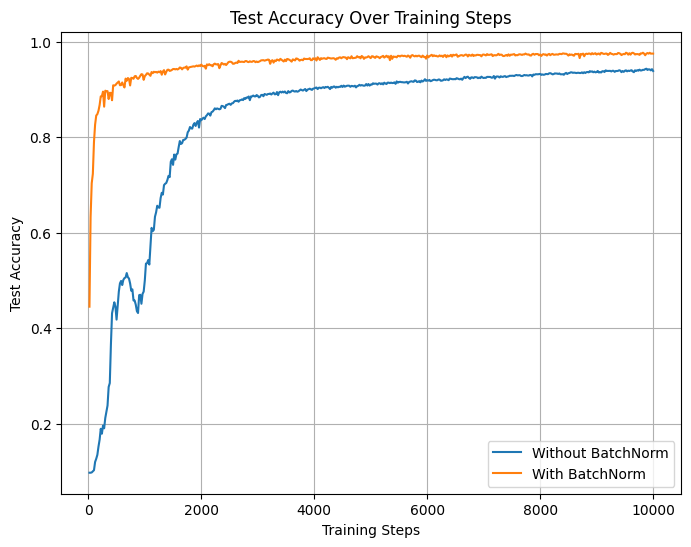

2. Put your analysis of the effectiveness of batch normalization for your network and dataset below. Did you duplicate their results?

**YOUR ANSWER GOES HERE**

Key Observations:

**Faster Convergence with BatchNorm:**
- The BatchNorm model (orange) reaches 90% accuracy in under 1,000 steps, while the non-BatchNorm model takes significantly longer (~3,000+ steps).
- This confirms that BatchNorm speeds up learning by stabilizing gradients.

**Higher Final Accuracy with BatchNorm:**
- The BatchNorm model reaches ~99% test accuracy, while the non-BatchNorm model stays slightly lower (~97-98%).
- This indicates that BatchNorm improves generalization in addition to training speed.

**Without BatchNorm: Slower but Still Converges Well**
- The non-BatchNorm model still reaches high accuracy, but takes longer to stabilize.


Did I duplicate the results?

- No, but with a small tweak, yes.
- I used the same specification as in the paper. 
    * First Hidden Layer: A linear (fully connected) layer with 100 neurons. 
    * Second Hidden Layer: Another linear layer with 100 neurons.
    * Third Hidden Layer: A third linear layer with 100 neurons.
    * A final linear layer with 10 output neurons, corresponding to the 10 digit classes (0-9). No activation function is applied at this stage because the CrossEntropyLoss function.
- However, I used ReLU instead of Sigmoid as the activation function after each hidden layer.
- I tried using Sigmoid as suggested by the paper, and the results are attached at the end of the code. However, the examples without BatchNorm could not be trained at all. The examples using BatchNorm perform similarly to those in the paper, although they are still slightly worse.



3. Put all your code (including network modules, data loaders, testing and training code) below.

In [ ]:
# YOUR ANSWER GOES HERE
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60, shuffle=True) # 60 examples per minibatch

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200, shuffle=False)

# Define simple fully connected network
class SimpleFCN(nn.Module):
    def __init__(self, use_batch_norm=False):
        super(SimpleFCN, self).__init__()
        self.use_batch_norm = use_batch_norm
        self.fc1 = nn.Linear(28*28, 100)
        self.bn1 = nn.BatchNorm1d(100) if use_batch_norm else nn.Identity()
        self.fc2 = nn.Linear(100, 100)
        self.bn2 = nn.BatchNorm1d(100) if use_batch_norm else nn.Identity()
        self.fc3 = nn.Linear(100, 100)
        self.bn3 = nn.BatchNorm1d(100) if use_batch_norm else nn.Identity()
        self.fc4 = nn.Linear(100, 10)
        # self.sigmoid = nn.Sigmoid()
        self.activation = nn.ReLU()
    def forward(self, x):
        # x = x.view(-1, 28*28)
        # x = self.sigmoid(self.bn1(self.fc1(x)))
        # x = self.sigmoid(self.bn2(self.fc2(x)))
        # x = self.sigmoid(self.bn3(self.fc3(x)))
        # x = self.fc4(x)
        # return x
        x = x.view(-1, 28*28)
        x = self.activation(self.bn1(self.fc1(x))) 
        x = self.activation(self.bn2(self.fc2(x))) 
        x = self.activation(self.bn3(self.fc3(x)))  
        x = self.fc4(x) 
        return x


# Training function
def train_model(model, optimizer, criterion, trainloader, testloader, steps=50000, eval_interval=20):
    model.train()
    step = 0
    test_accuracies = []
    steps_list = []
    
    for epoch in range(10):  # Iterate over epochs, break when steps reach 50000
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            step += 1
            
            if step % eval_interval == 0:
                acc = evaluate_model(model, testloader)
                test_accuracies.append(acc)
                steps_list.append(step)
                print(f"Step {step}, Test Accuracy: {acc:.4f}")
            
            if step >= steps:
                return steps_list, test_accuracies
    
    return steps_list, test_accuracies

# Evaluation function
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train models with and without Batch Normalization
models = {
    "Without BatchNorm": SimpleFCN(use_batch_norm=False).to(device),
    "With BatchNorm": SimpleFCN(use_batch_norm=True).to(device)
}

criterion = nn.CrossEntropyLoss()
optimizers = {
    name: optim.SGD(model.parameters(), lr=0.01) for name, model in models.items()
}

# Store results
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    steps_list, test_accuracies = train_model(model, optimizers[name], criterion, trainloader, testloader)
    results[name] = (steps_list, test_accuracies)

Training Without BatchNorm...
Step 20, Test Accuracy: 0.0974
Step 40, Test Accuracy: 0.0974
Step 60, Test Accuracy: 0.0980
Step 80, Test Accuracy: 0.1005
Step 100, Test Accuracy: 0.1027
Step 120, Test Accuracy: 0.1200
Step 140, Test Accuracy: 0.1267
Step 160, Test Accuracy: 0.1349
Step 180, Test Accuracy: 0.1522
Step 200, Test Accuracy: 0.1667
Step 220, Test Accuracy: 0.1894
Step 240, Test Accuracy: 0.1791
Step 260, Test Accuracy: 0.1961
Step 280, Test Accuracy: 0.1904
Step 300, Test Accuracy: 0.2120
Step 320, Test Accuracy: 0.2253
Step 340, Test Accuracy: 0.2381
Step 360, Test Accuracy: 0.2771
Step 380, Test Accuracy: 0.2852
Step 400, Test Accuracy: 0.3665
Step 420, Test Accuracy: 0.4316
Step 440, Test Accuracy: 0.4429
Step 460, Test Accuracy: 0.4544
Step 480, Test Accuracy: 0.4452
Step 500, Test Accuracy: 0.4181
Step 520, Test Accuracy: 0.4469
Step 540, Test Accuracy: 0.4768
Step 560, Test Accuracy: 0.4941
Step 580, Test Accuracy: 0.4991
Step 600, Test Accuracy: 0.4905
Step 620, Test

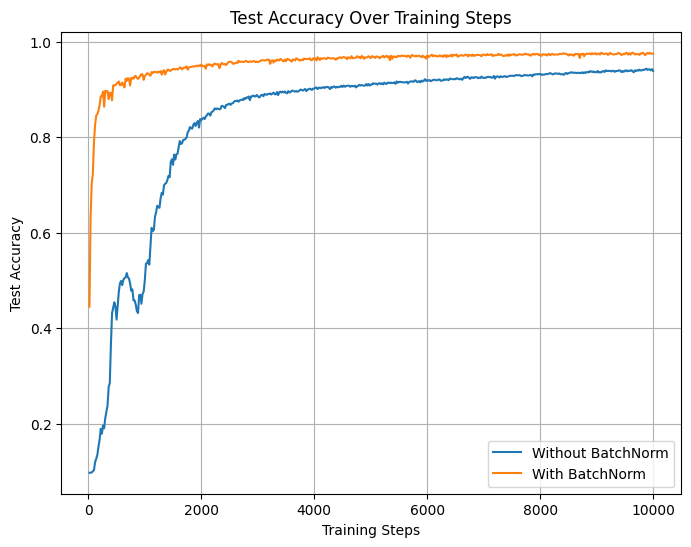

In [ ]:
# Plot results - ReLU activation function
plt.figure(figsize=(8,6))
for name, (steps_list, test_accuracies) in results.items():
    plt.plot(steps_list, test_accuracies, label=name)
plt.xlabel("Training Steps")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Over Training Steps")
plt.legend()
plt.grid()
plt.show()

In [161]:
# YOUR ANSWER GOES HERE
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60, shuffle=True) # 60 examples per minibatch

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200, shuffle=False)

# Define simple fully connected network
class SimpleFCN(nn.Module):
    def __init__(self, use_batch_norm=False):
        super(SimpleFCN, self).__init__()
        self.use_batch_norm = use_batch_norm
        self.fc1 = nn.Linear(28*28, 100)
        self.bn1 = nn.BatchNorm1d(100) if use_batch_norm else nn.Identity()
        self.fc2 = nn.Linear(100, 100)
        self.bn2 = nn.BatchNorm1d(100) if use_batch_norm else nn.Identity()
        self.fc3 = nn.Linear(100, 100)
        self.bn3 = nn.BatchNorm1d(100) if use_batch_norm else nn.Identity()
        self.fc4 = nn.Linear(100, 10)
        self.sigmoid = nn.Sigmoid()
        # self.activation = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.sigmoid(self.bn1(self.fc1(x)))
        x = self.sigmoid(self.bn2(self.fc2(x)))
        x = self.sigmoid(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x
        # x = x.view(-1, 28*28)
        # x = self.activation(self.bn1(self.fc1(x))) 
        # x = self.activation(self.bn2(self.fc2(x))) 
        # x = self.activation(self.bn3(self.fc3(x)))  
        # x = self.fc4(x) 
        # return x


# Training function
def train_model(model, optimizer, criterion, trainloader, testloader, steps=50000, eval_interval=20):
    model.train()
    step = 0
    test_accuracies = []
    steps_list = []
    
    for epoch in range(10):  # Iterate over epochs, break when steps reach 50000
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            step += 1
            
            if step % eval_interval == 0:
                acc = evaluate_model(model, testloader)
                test_accuracies.append(acc)
                steps_list.append(step)
                print(f"Step {step}, Test Accuracy: {acc:.4f}")
            
            if step >= steps:
                return steps_list, test_accuracies
    
    return steps_list, test_accuracies

# Evaluation function
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Train models with and without Batch Normalization
models = {
    "Without BatchNorm": SimpleFCN(use_batch_norm=False).to(device),
    "With BatchNorm": SimpleFCN(use_batch_norm=True).to(device)
}

criterion = nn.CrossEntropyLoss()
optimizers = {
    name: optim.SGD(model.parameters(), lr=0.01) for name, model in models.items()
}

# Store results
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    steps_list, test_accuracies = train_model(model, optimizers[name], criterion, trainloader, testloader)
    results[name] = (steps_list, test_accuracies)



Training Without BatchNorm...
Step 20, Test Accuracy: 0.1028
Step 40, Test Accuracy: 0.1028
Step 60, Test Accuracy: 0.1028
Step 80, Test Accuracy: 0.1135
Step 100, Test Accuracy: 0.1135
Step 120, Test Accuracy: 0.1009
Step 140, Test Accuracy: 0.1009
Step 160, Test Accuracy: 0.1028
Step 180, Test Accuracy: 0.1028
Step 200, Test Accuracy: 0.1135
Step 220, Test Accuracy: 0.1135
Step 240, Test Accuracy: 0.1135
Step 260, Test Accuracy: 0.1135
Step 280, Test Accuracy: 0.1135
Step 300, Test Accuracy: 0.1135
Step 320, Test Accuracy: 0.1135
Step 340, Test Accuracy: 0.1135
Step 360, Test Accuracy: 0.1135
Step 380, Test Accuracy: 0.1135
Step 400, Test Accuracy: 0.1028
Step 420, Test Accuracy: 0.1028
Step 440, Test Accuracy: 0.1135
Step 460, Test Accuracy: 0.1135
Step 480, Test Accuracy: 0.1135
Step 500, Test Accuracy: 0.1135
Step 520, Test Accuracy: 0.1135
Step 540, Test Accuracy: 0.1135
Step 560, Test Accuracy: 0.1135
Step 580, Test Accuracy: 0.1135
Step 600, Test Accuracy: 0.1135
Step 620, Test

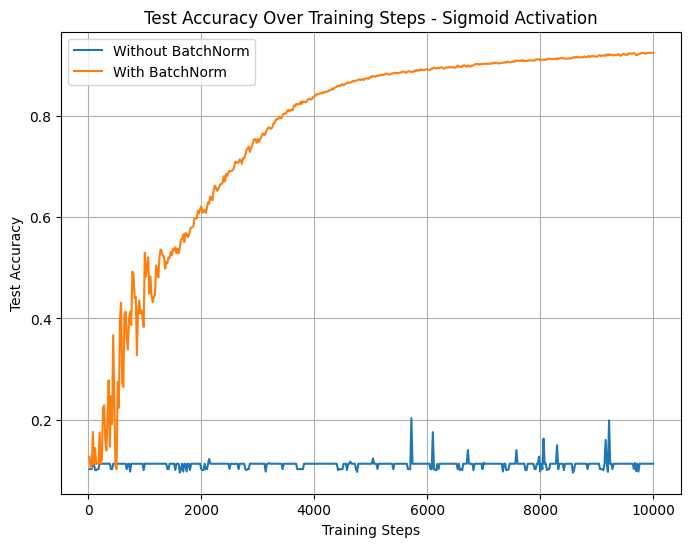

In [162]:
# Plot results - Sigmoid activation function
plt.figure(figsize=(8,6))
for name, (steps_list, test_accuracies) in results.items():
    plt.plot(steps_list, test_accuracies, label=name)
plt.xlabel("Training Steps")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Over Training Steps - Sigmoid Activation")
plt.legend()
plt.grid()
plt.show()